# Algorytmy Genetyczne i sztuczne sieci neuronowe

## Budowanie generatora do testowania sieci WTM (ang. SOM (Self-organizing map))

Specyfikacja dotycząca generatora:
<ul>
<li>Liczba grup danych = 5</li>
<li>Rozmiar danych = 2D</li>
<li>Zakres danych [0:100 ; 0:100]</li>
<li>Liczba obiektów w danej grupie danych = 10</li>
<li>Promień każdej grupy = 5</li>
</ul>

Przykładowy wykres wygenerowanych danych poniżej:

<img src="WTM_model_example.png"> 

<font color='red'> UWAGA!!!:</font> Wyświetlanie danych powinno być znormalizowane do zapisu np. [72, 10; ...]. Każda współrzędna kolejna poprzedzona speratorem ,, ; ''

<font color='yellow'> PS: Mieszanie danych podczas uczenia np. w przypadku alfabetu uczenie (a,b,c,d,...), potem uczenie od (g,h,i,j,...). Różne  możliwości????</font>

### Importowanie potrzebnych bibliotek

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

### Zmienne potrzebne do wygenerowania danych
<ul>
<li>number_of_groups - mienna określająca ilość grup danych</li>
<li>radius  - zmienna określająca promień okręgu, który posłużyć ma nam jako obszar generowanych obiektów danych</li>
<li>number_of_object - zmienna mówiąca o ilości obiektów jakie muszą być wygenerowane w określonej grupie danych </li>
</ul>

In [298]:
number_of_groups = 5    #Number of groups in model
radius = 5              #Circle radius
number_of_object = 10   #Number of object in each group

### Proces generowania koordynatów dla konkretnych grup
- za pomocą funkcji <font color='yellow'>,,zeros"</font> zawartej w bibliotece numpy generowana jest tablica 2D wypełniona zerami, która potem będzie wykorzystana do zapisu koordynatów poszczególnych wygenerowanych grup,
- funkcja <font color='yellow'>,,coordinate_generator_group(lst_groups)"</font> przekazuje w argumencie stworzoną wcześniej tablice 2D wypełnioną zerami. Następnie poprzez pętle for przechodzimy po poszczególnych elementach tablicy zapisując w niej wygenerowane punkty x i y w odpowiednim zakresie od 0 do 100. Zapis danych jest poprzez <font color='yellow'>,,element[0] & element[1]"</font>, które zapisują koordynaty w konkretnych miejscach podtablicy.
- wykorzystując bibliotekę pandas jesteśmy w stanie zapisać dane x i y w dwuwymiarowej strukturze danych, które oznaczone są rzędami i kolumnami. Pełni to funkcję przejrzystego wglądu do generowanych danych.

In [299]:
def coordinate_generator_group(temp_lst):
    for element in temp_lst:
        temp_x_point = random.randint(0,100)    #Generate x and y coordinate for specific group
        temp_y_point = random.randint(0,100)    
        element[0] = temp_x_point               #Save points in list
        element[1] = temp_y_point

In [300]:
lst_groups = np.zeros((number_of_groups,2))    #Create a list of groups coordinates

coordinate_generator_group(lst_groups)    #Function to generate coordinates for groups

groups = pd.DataFrame(lst_groups, columns =['x', 'y'])        #Load data groups in DataFrame object
print(groups)

      x     y
0  90.0  79.0
1   5.0  31.0
2  26.0  89.0
3  31.0  25.0
4  12.0  64.0


### Proces generowania koordynatów do obiektów konkretnych grup danych
- za pomocą wcześniej wspomnianej funkcji <font color=yellow>,,zeros"</font> generowana jest tablica 2D wypełniona zerami,
- wspomniana wyżej tablica nadpisywana jest poprzez wywołaną funkcję <font color=yellow>,,coordinate_generator_object(lst_objects)"</font>. W funkcji na początku został stworzony <font color=yellow>counter</font>, który pomoże podczas identyfkacji danego elementu w tablicy <font color=yellow>temp_lst</font>, która zawiera <font color=yellow>number_of_object*number_of_groups</font> elemenetów. Pierwszy człon pętli iteruje po elementach tablicy zawierającej koordynaty grup, następny człon natomiast będzie generował ilość punktów w grupie zdefiniowanej w zmiennej <font color=yellow>number_of_object</font>. Następnie przy pomocy wzorów na ogrąg generowane są punkty pod konkretnym kątem w okręgu, który jest grupą oraz zapisywane są w zmiennych <font color=yellow>temp_x</font> oraz <font color=yellow>temp_y</font>. Wygenerowane wcześniej koordynaty umieszczane są w konkretnych elementach tablicy jaki wskazuje nam zmienna <font color=yellow>coutner</font>. Na koniec zwracana jest tablica wraz z zapisanymi koordynatami.
- rownież z wykorzystaniem biblioteki pandas jesteśmy w sposób przejrzysty wyświetlić oraz manipulować danaymi.

In [301]:
def coordinate_generator_object(temp_lst):
    counter = 0                                                     #counter elements in array temp_lst
    for elements_lst_groups in lst_groups:
        for _ in range(number_of_object):
            r = radius * random.random()
            theta = 2 * math.pi *random.random()

            temp_x = elements_lst_groups[0] + r * math.cos(theta)   #Generate x and y coordinate for specific group
            temp_y = elements_lst_groups[1] + r * math.sin(theta)

            #print('x', temp_x, 'y', temp_y)
            temp_lst[counter][0] = temp_x
            temp_lst[counter][1] = temp_y
            counter+=1
    
    return temp_lst

In [302]:
lst_objects = np.zeros((number_of_object*number_of_groups, 2))     #list of object which contain x, y coordinate

lst_objects = coordinate_generator_object(lst_objects)

objects = pd.DataFrame(lst_objects, columns =['x', 'y'])        #Load data groups in DataFrame object
print(objects)

            x          y
0   85.733329  79.866171
1   89.866145  79.916582
2   86.504713  77.038780
3   87.443581  77.407805
4   91.525077  76.313239
5   89.928304  79.642787
6   92.401557  77.659462
7   94.179610  80.933359
8   88.637727  80.069732
9   87.268215  76.693038
10   5.301525  27.134136
11   5.231141  33.841269
12   5.318680  29.972205
13   3.261449  29.549060
14   4.804065  29.849601
15   6.864379  28.416929
16   3.429686  29.103061
17   6.243558  30.727571
18   2.797215  30.904263
19   3.919043  31.331535
20  25.969283  88.911375
21  25.588296  87.917271
22  26.256704  84.429628
23  26.150447  89.653916
24  28.407991  87.342034
25  25.684477  88.197538
26  26.279463  87.773167
27  22.337090  89.417114
28  30.618842  88.071545
29  28.621166  90.880750
30  30.642722  23.598352
31  34.832635  26.021543
32  30.505551  22.238091
33  33.653500  26.017570
34  32.764084  23.286877
35  29.500812  23.684012
36  31.374819  23.394373
37  30.017901  25.108588
38  34.740568  28.149659


### Proces wyświetlania wygenerowanych danych na diagramie z użyciem biblioteki matplotlib
- Funkcja <font color=yellow>createCircles(item, radius)</font>, do której przekazywane są konkretne koordynaty wygenerowanych grup danych oraz promień koła wykorzystywane są do określenia środka oraz promienia rysowanego okręgu. 

In [303]:
def  createCircles(centre, radius):
    return plt.Circle((centre[0], centre[1]), radius, color='b', fill=False)

5


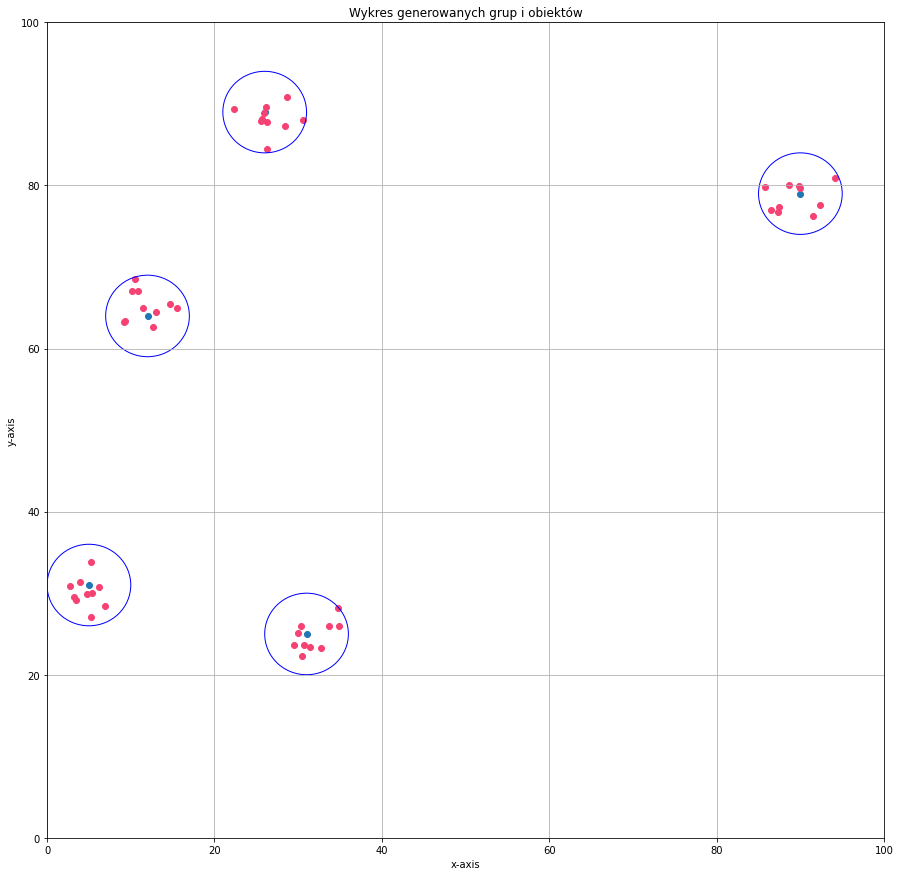

In [305]:
# Creating a new figure 
fig, ax = plt.subplots(figsize=(15,15))

# Numpy array as scatter plot
plt.scatter(x=groups['x'],y=groups['y'])
plt.scatter(x=objects['x'],y=objects['y'], color= '#f54272')

print(len(lst_groups))

for item in lst_groups:
    ax.add_patch(createCircles(item, radius))

# Adding details to the plot
plt.title('Wykres generowanych grup i obiektów')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Displaying the plot
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.show()